# TestCase 4

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config4.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 4
# version : 1
# error_estimations : {'param_num': 2}
# gains : {'n_params': 0}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
high_degree = 10

In [4]:
assert testcase == 4
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [11]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
if version==1:
    from testcases.networks.test_2D.test_4.test_4_v1 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase4
problem = TestCase4(version=version)

2
[[-0.5, 0.500001], [-0.5, 0.500001]]
[[-0.5, 0.500001], [-0.5, 0.500001]]
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe4.pth
network loaded
Error  tensor([0.0006])


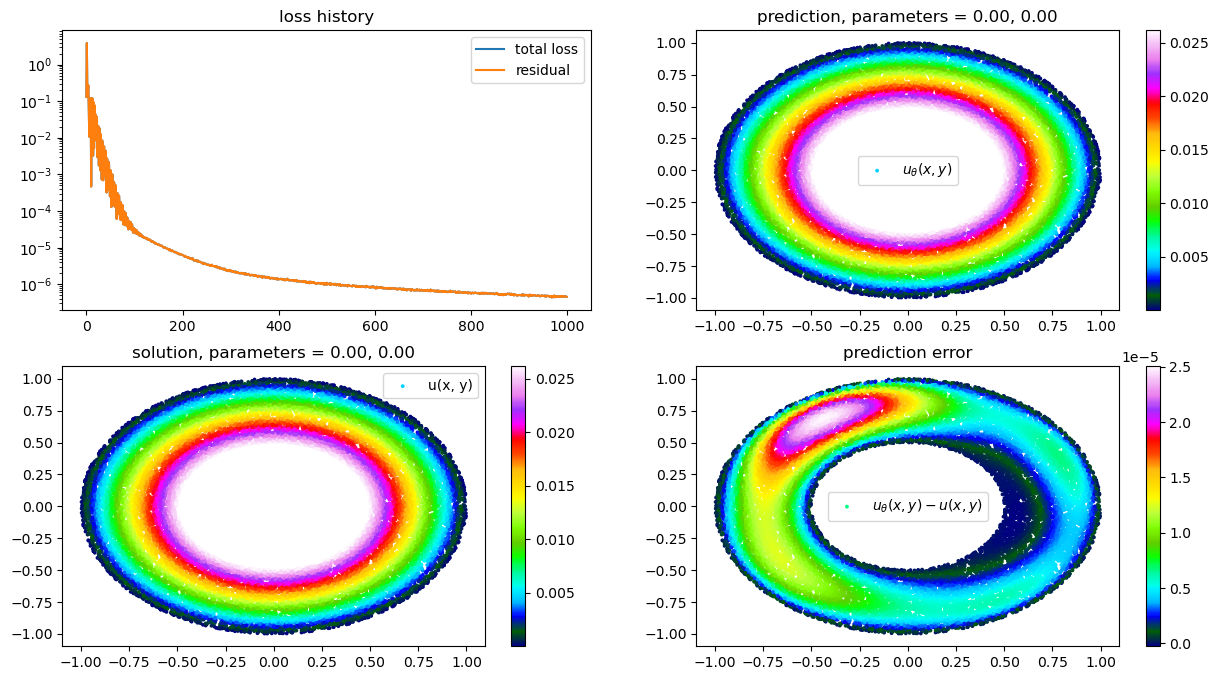

In [12]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [13]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

In [14]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/


### Run FEM

In [15]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Run error estimation with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
nb_vert=16, norme_L2=0.007788651786490482
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Building point search tree to accelerate distance queries.
Computed bounding box tree with 3139 nodes for 1570 points.
nb_vert=32, norme_L2=0.0011730982341129205
V created with  64  vertices and degree  4  : h = 0.04347038548979546
Building point search tree to accelerate distance queries.
nb_vert=64, norme_L2=0.00034787058134452375
Computed bounding box tree with 12455 nodes for 6228 points.
V created with  128  vertices and degree  4  : h = 0.021977

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/FEM_case4_v1_param2_degree1.csv
## Run error estimation with FEM for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
nb_vert=16, norme_L2=0.00016783681451993927
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Building point search tree to accelerate distance queries.
nb_vert=32, norme_L2=2.214472566479969e-05
Computed bounding box tree with 3139 nodes for 1570 points.
V created with  64  vertices and degree  4  : h = 0.04347038548979546
Building point search tree to accelerate distance queries.
Computed bounding box tr

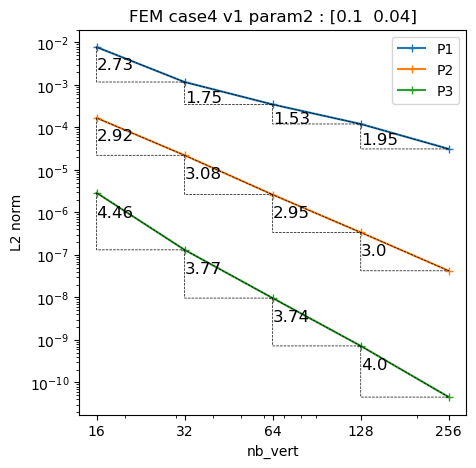

In [16]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [17]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
nb_vert=16, norme_L2=4.5733848440749756e-05
Computed bounding box tree with 746807 nodes for 373404 points.
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Building point search tree to accelerate distance queries.
Computed bounding box tree with 3139 nodes for 1570 points.
nb_vert=32, norme_L2=1.240257419114214e-05
V created with  64  vertices and degree  4  : h = 0.04347038548979546
Building point search tree to accelerate distance queries.
Computed bounding box tree with 12455 nodes for 6228 points.
nb_vert=64, norme_L2=3.195960063283164e-06
V created with  128  vertices and degree  4  : h = 0.0219

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/Corr_case4_v1_param2_degree1.csv
## Run error estimation with Corr for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
nb_vert=16, norme_L2=2.1610557897407248e-06
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Building point search tree to accelerate distance queries.
Computed bounding box tree with 3139 nodes for 1570 points.
nb_vert=32, norme_L2=3.001068207066755e-07
V created with  64  vertices and degree  4  : h = 0.04347038548979546
Building point search tree to accelerate distance queries.
Computed bounding box 

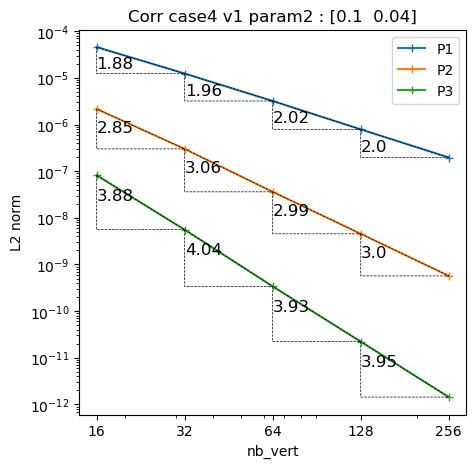

In [18]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/FEM_case4_v1_param2_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/FEM_case4_v1_param2_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/FEM_case4_v1_param2_degree3.csv


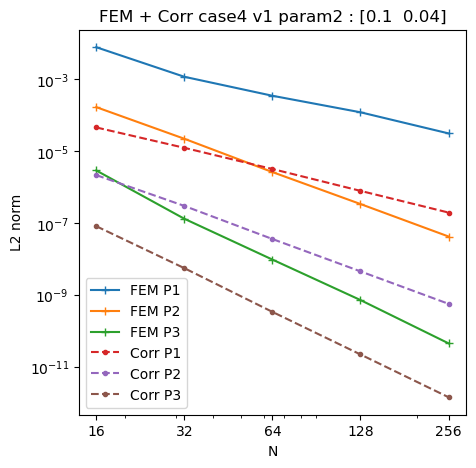

In [19]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [20]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp